# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** It's a classification problem, since we need predict if one student need early intervention rather than predict a continous number.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [255]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [256]:
student_data.shape

(395, 31)

In [257]:
pd.options.display.max_columns = None
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,yes


In [258]:
# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = student_data.shape[1] - 1

# TODO: Calculate passing students
n_passed = np.sum(student_data['passed'] == 'yes')

# TODO: Calculate failing students
n_failed = np.sum(student_data['passed'] == 'no')

# TODO: Calculate graduation rate
grad_rate = 1.0 * n_passed / n_students * 100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [259]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father    

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [260]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [261]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train = None
X_test = None
y_train = None
y_test = None

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=num_train, random_state=61916)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

In [262]:
X_train.head()

,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Medu,Fedu,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
374,0.0,1.0,1.0,0.0,18,1.0,0.0,0.0,1.0,0.0,1.0,4,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2,3,0,0,0,0,0,1,1,1,0,5,4,4,1,1,1,0
162,1.0,0.0,0.0,1.0,16,0.0,1.0,0.0,1.0,0.0,1.0,1,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2,1,1,0,0,0,1,1,1,0,0,4,4,4,2,4,5,0
204,1.0,0.0,1.0,0.0,16,1.0,0.0,1.0,0.0,0.0,1.0,2,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2,4,0,0,1,1,1,0,1,1,0,5,3,5,1,1,5,6
176,1.0,0.0,1.0,0.0,16,0.0,1.0,1.0,0.0,0.0,1.0,2,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2,2,0,0,0,1,1,0,1,1,0,3,4,4,1,4,5,2
141,1.0,0.0,0.0,1.0,16,0.0,1.0,0.0,1.0,0.0,1.0,2,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2,1,2,0,1,0,1,1,1,1,0,2,3,3,2,2,2,8


In [263]:
# Check the correlations of features
corrs = X_train.corr().abs().unstack().order(kind="quicksort", ascending=False)
corrs[corrs.between(0, 1,inclusive=False)][::2]
# only four features have correlation above 0.5

guardian_mother    guardian_father    0.798082
Fjob_services      Fjob_other         0.680301
Walc               Dalc               0.649826
Medu               Fedu               0.623223
Mjob_services      Mjob_other         0.464775
reason_course      reason_home        0.458014
guardian_other     guardian_mother    0.454949
Medu               Mjob_teacher       0.449699
reason_reputation  reason_course      0.439261
goout              Walc               0.429227
Mjob_at_home       Medu               0.418872
Fedu               Fjob_teacher       0.393825
reason_reputation  reason_home        0.379161
age                guardian_other     0.370908
                   school_MS          0.347371
                   school_GP          0.347371
failures           higher             0.342240
Fjob_other         Fjob_teacher       0.332674
address_U          traveltime         0.325333
traveltime         address_R          0.325333
Mjob_at_home       Mjob_other         0.314568
Mjob_teacher 

**Answer: **

__Decision Tree__
- Application:
    - Agriculture: Application of a range of machine learning methods to problems in agriculture and horticulture.
    - Astronomy: Astronomy has been an active domain for using automated classification techniques. 
    - Biomedical Engineering: Use of decision trees for identifying features to be used in implantable devices.
    - Control Systems: Automatic induction of decision trees was recently used for control of nonlinear dynamical systems.
    - Financial analysis: Use of CART for asserting the attractiveness of buy-writes.
    - Manufacturing and Production: Decision trees have been recently used to non-destructively test welding quality, for semiconductor manufacturing, for increasing productivity, for material procurement method selection, etc..
    - Medicine: Medical research and practice have long been important areas of application for decision tree techniques. - cular biology: Initiatives such as the Human Genome Project and the GenBank database offer fascinating opportunities for machine learning and other data exploration methods in molecular biology.
    - Object recognition: Tree based classification has been used recently for recognizing three dimensional objects and for high level vision.
    - Pharmacology: Use of tree based classification for drug analysis.
- Pros:
    - White box model, simple to understand and to interpret to visualise.
    - Requires little data preparation.
    - The cost of predicting data is logarithmic in the number of data points used to train the tree.
    - Able to handle both numerical and categorical data.
    - Able to handle multi-output problems.
- Cons:
    - Tend to go overfitting, needs stop conditions and pruning(not currently supported in sklearn)
    - Sensitive to small variations
    - Heuristic based algorithms such as the greedy algorithm cannot guarantee globally optimal. 
    - Hard to learn concepts containing such as XOR, parity or multiplexer problems that decision tree is not good at
    - Create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.
    - All the cons can be mitigated by using ensemble methods (random forest).

__Naive Bayes__
- Application:
    - Spam detection.
    - Automatic assignment of categories to a set of items, classify a news article about technology, politics, or sports.
    - Automatic detection of the primary language.
    - Sentiment analysis.
    - Also used for face recognition softwares.
- Pros:
    - Easy to understand, implement
- Cons:
    - Perform poorly if features are correlated
    - Perform poorly if independence assumptions do not hold.

__Support Vector Machines__
- Application:
    - SVMs are helpful in text and hypertext categorization as their application can significantly reduce the need for labeled training instances in both the standard inductive and transductive settings.
    - Classification of images can also be performed using SVMs. Experimental results show that SVMs achieve significantly higher search accuracy than traditional query refinement schemes after just three to four rounds of relevance feedback. This is also true of image segmentation systems, including those using a modified version SVM that uses the privileged approach as suggested Vapnik.
    - Hand-written characters can be recognized using SVM. 
    - The SVM algorithm has been widely applied in the biological and other sciences. They have been used to classify proteins with up to 90% of the compounds classified correctly. Permutation tests based on SVM weights have been suggested as a mechanism for interpretation of SVM models. Support vector machine weights have also been used to interpret SVM models in the past. Posthoc interpretation of support vector machine models in order to identify features used by the model to make predictions is a relatively new area of research with special significance in the biological sciences.
- Pros:
    - Effective in high dimensional spaces.
    - Still effective in cases where number of dimensions is greater than the number of samples.
    - Memory efficient by using a subset of training points(support vectors) in kernels.
    - Flexible kernels.
- Cons:
    - Not effetive if the number of features is much greater than the number of samples
    - SVMs do not directly provide probability estimates, can be mitigated by expensive five-fold cross-validation.

As defined in the previous question, classification algorithms are needed for this project. All these three could be candidates. Other considerations are as follows:

- Reason for Decision Tree: the prediction result is easy to visualize, although the training data is not scaled, decision tree is not concerned with scaling or normalizing.
- Reason for Naive Bayes: It's easy to implement, and more importantly, the features are not highly correlated between each other, so it is good choice for Naive Bayes.
- Reasons for SVM: SVM works well for binary classification, since the label is binary for 'yes' or 'no'. Besides, there is no need to output probability, which SVM itself could not output.

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [264]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    train_time = end - start
    # Print the results
    print "Trained model in {:.4f} seconds".format(train_time)
    
    return train_time

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # output the prediction time
    pred_time = end - start
    
    # output the f1 score
    f1 = f1_score(target.values, y_pred, pos_label='yes')
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(pred_time)
    return pred_time, f1


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_time = train_classifier(clf, X_train, y_train)
    
    # get the prediction time and f1 of train and test data
    pred_train_time, f1_train = predict_labels(clf, X_train, y_train)
    pred_test_time, f1_test = predict_labels(clf, X_test, y_test)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(f1_train)
    print "F1 score for test set: {:.4f}.".format(f1_test)
    
    return train_time, pred_train_time, pred_test_time, f1_train, f1_test

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [265]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state=101)
clf_B = GaussianNB()
clf_C = SVC()

# TODO: Set up the training set sizes
# X_train_100 = 100
# y_train_100 = 100

# X_train_200 = 200
# y_train_200 = 200

# X_train_300 = 300
# y_train_300 = 300

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf_A, X_train[:X_train_100], y_train[:y_train_100], X_test, y_test)

In [266]:
# record the computation time and f1 scores into a dictionary
results = {}
for clf in [clf_A, clf_B, clf_C]:
    key = clf.__class__.__name__
    classifier = []
    print "\n{}: \n".format(key)
    for n in [100, 200, 300]:
        classifier.append(train_predict(clf, X_train[:n], y_train[:n], X_test, y_test))
    results[key] = pd.DataFrame(classifier, columns=['train_time', 'pred_train_time', 'pred_test_time', 'f1_train', 'f1_test'])


DecisionTreeClassifier: 

Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.0010 seconds
Made predictions in 0.0002 seconds.
Made predictions in 0.0002 seconds.
F1 score for training set: 1.0000.
F1 score for test set: 0.8030.
Training a DecisionTreeClassifier using a training set size of 200. . .
Trained model in 0.0014 seconds
Made predictions in 0.0002 seconds.
Made predictions in 0.0001 seconds.
F1 score for training set: 1.0000.
F1 score for test set: 0.7077.
Training a DecisionTreeClassifier using a training set size of 300. . .
Trained model in 0.0018 seconds
Made predictions in 0.0002 seconds.
Made predictions in 0.0001 seconds.
F1 score for training set: 1.0000.
F1 score for test set: 0.7107.

GaussianNB: 

Training a GaussianNB using a training set size of 100. . .
Trained model in 0.0005 seconds
Made predictions in 0.0002 seconds.
Made predictions in 0.0002 seconds.
F1 score for training set: 0.2338.
F1 score for test set: 0.5000.
Tr

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - Decision Tree**  

| Training Set Size | Prediction Time (train) | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0002           |           0.0002       |       1.0000     |     0.8030      |
| 200               |        0.0002           |           0.0001       |       1.0000     |     0.7077      |
| 300               |        0.0002           |           0.0002       |       1.0000     |     0.7107      |

** Classifer 2 - Naive Bayes**  

| Training Set Size | Prediction Time (train) | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0003           |         0.0002         |       0.2338     |      0.5000     |
| 200               |        0.0003           |         0.0002         |       0.8432     |      0.7852     |
| 300               |        0.0005           |         0.0002         |       0.8112     |      0.7826     |

** Classifer 3 - SVM**  

| Training Set Size | Prediction Time (train) | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0010           |       0.0009           |     0.9128       |      0.8133     |
| 200               |        0.0020           |       0.0011           |     0.8889       |      0.8026     |
| 300               |        0.0042           |       0.0028           |     0.8590       |      0.8105     |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Chosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: ** The SVM is the best model based on the F1 Score of test set.

### Plot the computation time and f1 scores

In [267]:
# training times for three models
pred_train_time = pd.concat([results['DecisionTreeClassifier']['train_time'], results['GaussianNB']['train_time'], results['SVC']['train_time']], axis=1)
# prediction time for three models
pred_train_time = pd.concat([results['DecisionTreeClassifier']['pred_test_time'], results['GaussianNB']['pred_test_time'], results['SVC']['pred_test_time']], axis=1)
# train f1 scores for three models
f1_train = pd.concat([results['DecisionTreeClassifier']['f1_train'], results['GaussianNB']['f1_train'], results['SVC']['f1_train']], axis=1)
# test f1 scores for three models
f1_test = pd.concat([results['DecisionTreeClassifier']['f1_test'], results['GaussianNB']['f1_test'], results['SVC']['f1_test']], axis=1)

In [268]:
import matplotlib.pyplot as plt
%matplotlib inline

In [269]:
for result in [pred_train_time, pred_train_time, f1_train, f1_test]:
    result.columns = ['DecisionTreeClassifier', 'GaussianNB', 'SVC']
    result.index = [100, 200, 300]
    print result

     DecisionTreeClassifier  GaussianNB       SVC
100                0.000150    0.000242  0.000629
200                0.000147    0.000244  0.001157
300                0.000131    0.000238  0.001472
     DecisionTreeClassifier  GaussianNB       SVC
100                0.000150    0.000242  0.000629
200                0.000147    0.000244  0.001157
300                0.000131    0.000238  0.001472
     DecisionTreeClassifier  GaussianNB       SVC
100                     1.0    0.233766  0.912752
200                     1.0    0.843206  0.888889
300                     1.0    0.811189  0.858974
     DecisionTreeClassifier  GaussianNB       SVC
100                0.803030    0.500000  0.813333
200                0.707692    0.785185  0.802632
300                0.710744    0.782609  0.810458


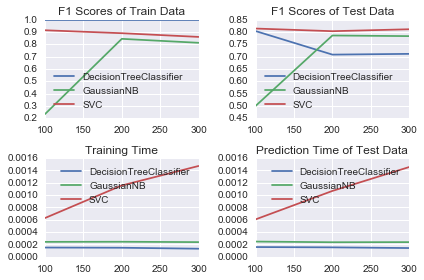

In [270]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax1.plot(f1_train.index, f1_train)
ax1.legend(f1_train.columns, loc=0)
ax1.set_title('F1 Scores of Train Data')

ax2 = fig.add_subplot(222)
ax2.plot(f1_test.index, f1_test)
ax2.legend(f1_test.columns, loc=0)
ax2.set_title('F1 Scores of Test Data')

ax3 = fig.add_subplot(223)
ax3.plot(pred_train_time.index, pred_train_time)
ax3.legend(pred_train_time.columns, loc=0)
ax3.set_title('Training Time')

ax4 = fig.add_subplot(224)
ax4.plot(pred_test_time.index, pred_test_time)
ax4.legend(pred_test_time.columns, loc=0)
ax4.set_title('Prediction Time of Test Data')

plt.tight_layout()
plt.show()

Findings of F1 scores:
    - SVM shows the highest f1 score for test data.
    - F1 score of SVM decreased constantly in train data but decreased first and then increased in test data around 200 data points.
    - Decision tree has the perfect f1 score without intervening the tree generation, but perfomred badly in test data. But the train data begins to increase after 200 data points. So adding stop conditions or more data points are the solution.
    - F1 score of Naive bayes gradually increased till 200 data points and slightly decreased afterwards.

Fingdings of computation time:
    - Both Naive Bayes and Decision Tree have much lower computation time than SVC in training stage or prediction stage.
    - SVM increased constantly in prediction time.
    
Since the computation time is nominal for this dataset, I will choose the SVM with highest f1 score as the best model.

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. For example if you've chosen to use a decision tree or a support vector machine, how does the model go about making a prediction?*

**Answer: ** 

SVM is trying to find the decision boundary or hyperplane(usually N-1 dimention, if the data points are N dimention) that maximize the margin between different classes, please see the first graph below. 
- In training stage, SVM first finds the support vectors, data points nearest to the boundary between different classes, then, by choosing the boundary that has the most distances between the support vetors(called margin), SVM finally builds the model for the data points.
- In prediction stage, SVM outputs the prediction based on which side one data point falls in. In the first graph, if the data point is in the right side of the hyperplane, SVM will predict it as the red class, otherwise the green one.

__Kernels__. SVM could definitely find the decision boundary if the data points are linearly seperable. But if the data points are non-linear, or in another way, there is no linear boundary that could seperate the classes, then kernels are required(linear SVM use the linear kernel, one type of kernels). What non-linear kernels do is to lift the current dimension of data points into a higher one so that we could find a hyperplane to seperate the class. In the second graph, a 2D datapoint moves away from 2D to 3D, then a hyperplane is found to seperate the data points. In the third paragraph, the hyperplane is projected back to 2D, and the data points are seperated non-linearly.

<img src="./SVM2.png"> 
<img src="./data_2d_to_3d_hyperplane.png">

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [271]:
# TODO: Import 'gridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

# TODO: Create the parameters list you wish to tune
parameters = [{'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}]

# TODO: Initialize the classifier
clf = SVC()

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train)[1])
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test)[1])

Made predictions in 0.0052 seconds.
Tuned model has a training F1 score of 0.9806.
Made predictions in 0.0021 seconds.
Tuned model has a testing F1 score of 0.8235.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: ** Tuned model has a training F1 score of 0.9806, up by 0.1216. Tuned model has a testing F1 score of 0.8235, up by 0.013

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.